====== Nguồn http://users.soict.hust.edu.vn/khoattq/ml-dm-course/ ======



## Bài toán
 - Dự đoán khả năng tiến triển của bệnh tiểu đường thông qua các chỉ số sinh lý của cơ thể.


## Thông tin dữ liệu:

- Số lượng mẫu: 442 (thông tin từ 442 bệnh nhân)
- Thông tin ccs thuộc tính (10 cột đầu tiên):
  - Age(tuổi)
  - Sex (giới tính) 
  - Body mass index (chỉ số khối cơ thể)
  - Average blood pressure(huyết ap trung bình)
  - S1, S2, S3, S4, S5, S6 (sáu phép đo huyết thanh khác)
- Mục tiêu: Cột 11, chỉ số đánh giá mức độ tiến triển của bệnh sau 1 năm điều trị

**! Chú ý: Các thuộc tính trong dữ liệu đã được chuẩn hóa**

Xem thêm thông tin về nguồn dữ liệu tại: (https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)


## Hướng giải quyết

Giả sử rằng khả năng tiến triển của bệnh tiểu đường (ký hiệu: `y`) là đại lượng phụ thuộc tuyến tính vào các thông tin sinh lý của bệnh nhân như các thuộc tính đã mô tả ở trên (tuổi, giới tính, chỉ số khối, ... - ký hiệu: $x_1, x_2, .. x_n$) : 

$y = w_0 + w_1x_1 + w_1x_2 + ... + w_nx_n$

Mục tiêu: Tìm được bộ trọng số $[w_0, w_1, w_2... w_n]$ biểu diễn mối quan hệ này. 

## Thư viện sử dụng 

- matplotlib: phục vụ vẽ các đồ thị 
- numpy: tính toán các phép biến đổi trên ma trận / vector 
- math: thực hiện một số hàm tính toán đơn giản
- pandas: Xử lý dữ liệu bảng hai chiều 
- scikit-learn: (sklearn) thư viện hỗ trợ xây dựng các mô hình học máy, các hàm huấn luyện và đánh giá 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import math 
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


Matplotlib is building the font cache; this may take a moment.


## 1. Đọc dữ liệu huấn luyện

Dữ liệu huấn luyện về bệnh tiểu đường được lưu dưới dạng file .pkl với hai thuộc tính:
- data: ma trận 2 chiều (400x10) - các thông tin bệnh nhân được chuẩn hoá về dạng số thực
- target: mảng các số thực (400,) - chỉ số tiến triển của bệnh tiểu đường

In [2]:
with open('data/diabetes_train.pkl', 'rb') as f:
    diabetes_train = pickle.load(f)
print("Số chiều input: ", diabetes_train['data'].shape)
print("Số chiều target y tương ứng: ", diabetes_train['target'].shape)
print()

print("2 mẫu dữ liệu đầu tiên:")
print("input: ", diabetes_train['data'][:2])
print("target: ",diabetes_train['target'][:2])

Số chiều input:  (400, 10)
Số chiều target y tương ứng:  (400,)

2 mẫu dữ liệu đầu tiên:
input:  [[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]]
target:  [151.  75.]


## 2. Xây dựng mô hình hồi quy sử dụng Sklearn

Thử nghiệm xây dựng và huấn luyện mô hình hồi quy tuyến tính (Linear Regression)
- [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) `linear_model.LinearRegression()`

In [3]:
# Xây dựng mô hình sử dụng thư viện scikit-learn
regr = linear_model.LinearRegression()


## 3. Huấn luyện mô hình

Sử dụng dữ liệu đã được chia ở bước trước đó để thực hiện huấn luyện mô hình 

=> Tìm được bộ trọng số $[w_0, w_1, ... w_n]$

In [4]:
# huấn luyện mô hình
regr.fit(diabetes_train['data'], diabetes_train['target'])
print("[w1, ... w_n] = ", regr.coef_)
print("w0 = ", regr.intercept_)

[w1, ... w_n] =  [   5.02597344 -238.41461528  521.63399624  299.94110951 -752.12376074
  445.15341214   83.51201877  185.57718337  706.4729074    88.68448421]
w0 =  152.72942545098695


## 4. Dự đoán các mẫu dữ liệu trong tập test 

# 4.1 Phán đoán

In [5]:
# đọc dữ liệu test
# dữ liệu test có cấu trúc giống dữ liệu huấn luyện nhưng số lượng mẫu chỉ là 42
with open('data/diabetes_test.pkl', 'rb') as f:
    diabetes_test = pickle.load(f)

# Thực hiện phán đoán cho dữ liệu mới
diabetes_y_pred = regr.predict(diabetes_test['data'])

## 4.2 Kiểm tra chất lượng phán đoán

In [6]:
df = pd.DataFrame(data=np.array([diabetes_test['target'], diabetes_y_pred,
                            abs(diabetes_test['target'] - diabetes_y_pred)]).T,
             columns=["y thực tế", "y dự đoán", "Lệch"])

# In ra 5 phán đoán đầu tiên
df.head(5)

,y thực tế,y dự đoán,Lệch
0,175.0,185.393435,10.393435
1,93.0,90.338849,2.661151
2,168.0,152.325453,15.674547
3,275.0,250.866783,24.133217
4,293.0,198.458698,94.541302


Sử dụng độ đo RMSE (căn bậc 2 của trung bình bình phương lỗi) 
> $\text{RMSE}(y, \hat{y}) = \sqrt{\frac{1}{m} \sum\limits_{i=1}^{m} (y_i - \hat{y}_i)^2}$

- RMSE càng nhỏ càng thể hiện mô hình có khả năng học và dự đoán hiệu quả

In [15]:
rmse = math.sqrt(mean_squared_error(diabetes_test['target'], diabetes_y_pred))
print(f'RMSE = {rmse}')

RMSE = 40.85033252728767


Phân phối các dự đoán đầu ra của mô hình

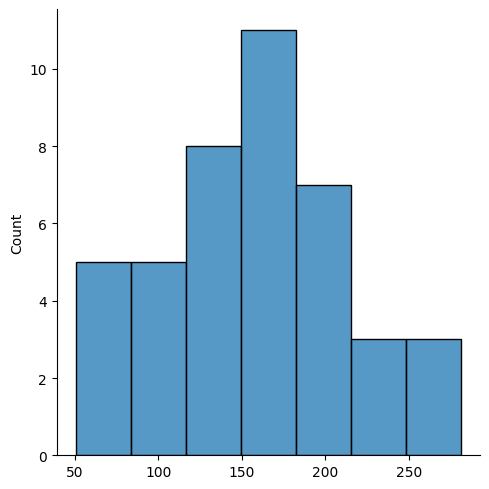

In [7]:
sns.displot(diabetes_y_pred, )

Hình ảnh mô tả phân phối các dự đoán đầu ra của mô hình trên dữ liệu test. Trong đó, trục ngang là giá trị dự đoán và trục đứng là số lần dự đoán các giá trị đó.